In [65]:
"""
Name - Anish Joshi
Reg.No- 21BCE1649
Campus - VIT CHENNAI
Branch - CSE CORE

"""

'\nName - Anish Joshi\nReg.No- 21BCE1649\nCampus - VIT CHENNAI\nBranch - CSE CORE\n\n'

In [66]:
import pandas as pd
import numpy as np

In [67]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [68]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [69]:
df.shape

(200, 5)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## DATA PREPROCESSING

In [71]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [72]:

from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

In [73]:
# Dropping the ID column

df = df.drop(columns =['CustomerID'],axis =1)

In [74]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [75]:
df['Gender'] = le.fit_transform(df['Gender'])

In [76]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [77]:
# finding the outliers

import seaborn as sns


<Axes: >

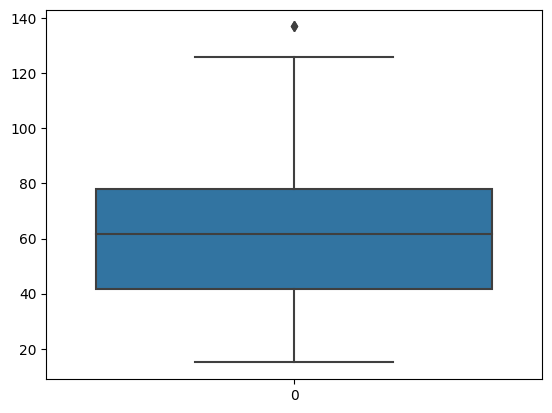

In [78]:
sns.boxplot(df['Annual Income (k$)'])

<Axes: >

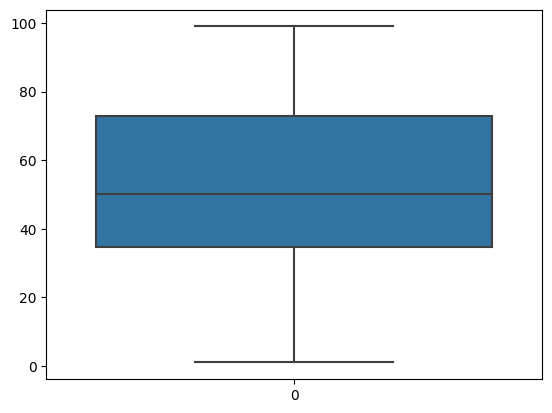

In [79]:
sns.boxplot(df['Spending Score (1-100)'])

<Axes: >

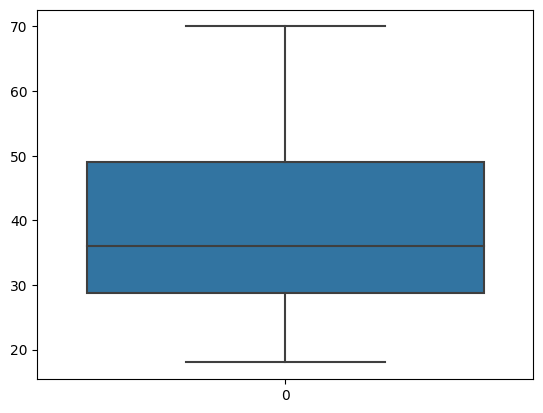

In [80]:
sns.boxplot(df['Age'])

In [81]:
# standardizing the dataframe


In [82]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

In [83]:
scaled_df = ss.fit_transform(df)

In [84]:
new_df = pd.DataFrame(scaled_df)

In [85]:
new_df.head()

,0,1,2,3
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


##  TRAINING THE MODEL

In [86]:
from sklearn import cluster

In [87]:
error=[]
for i in range(1,30):
  kmeans = cluster.KMeans(n_clusters=i,init = 'k-means++',random_state=0)
  kmeans.fit(new_df)
  error.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [88]:
error


[800.0000000000001,
 588.8026767824938,
 476.78755441351586,
 386.7147857740687,
 325.4485704854347,
 275.19500469394814,
 236.25761095237868,
 200.3138821716555,
 174.12493921599275,
 152.02983429775685,
 137.17265166335824,
 127.86560025606869,
 114.52038092919221,
 106.99872070690603,
 100.18630060748164,
 93.43568422575257,
 88.88020968203547,
 82.26653662178543,
 79.97881158068645,
 73.96251302138975,
 69.39837989156264,
 66.61373512206926,
 63.22590912036435,
 59.86126420449955,
 56.147124720237784,
 53.50655750828804,
 51.28271630221485,
 49.14664636995765,
 48.34022885823106]

In [89]:

import matplotlib.pyplot as plt

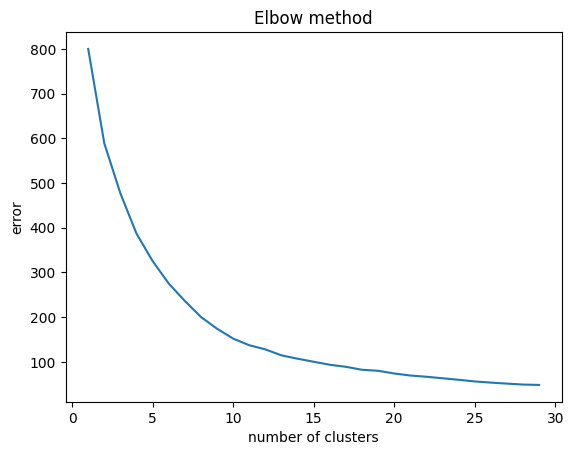

In [90]:
plt.plot(range(1,30),error)
plt.title('Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.show()


In [91]:
# Here we can choose cluster value form 10 to 15 as the no of clusters

# So let's choose the n-clusters value as 12

In [92]:
km_model = cluster.KMeans(n_clusters=13,init = 'k-means++',random_state=0)


In [93]:
km_model.fit(new_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=13, random_state=0)

In [94]:
pred = km_model.predict(new_df)

In [95]:
new_df['cluster'] = pred

In [96]:
new_df['cluster'].value_counts()

4     26
11    24
1     21
2     20
5     18
6     14
0     14
10    13
8     13
3     11
7     11
9      9
12     6
Name: cluster, dtype: int64

In [97]:
new_df.head()

,0,1,2,3,cluster
0,1.128152,-1.424569,-1.738999,-0.434801,3
1,1.128152,-1.281035,-1.738999,1.195704,3
2,-0.886405,-1.352802,-1.700830,-1.715913,10
3,-0.886405,-1.137502,-1.700830,1.040418,6
4,-0.886405,-0.563369,-1.662660,-0.395980,10
